In [15]:
import numpy as np
from scipy import sparse as sp
from scipy.sparse.linalg import spsolve
from matplotlib import pyplot as plt
from matplotlib.ticker import IndexLocator
import time, sys
import pickle
from scipy.stats import qmc

In [16]:
# Given parameters
nx = 60
ny = 60
m=nx*ny
tf = 3.0
dt = 5.0e-3
nt = int(tf/dt)
xmin = -1; xmax = 1
ymin = -1; ymax = 1
dims=(nx,ny)

# POD basis
num_basis=np.array([3,4,5,6])
print('num_basis {}'.format(num_basis))

# parameters
p_inter=5
FOM_parameters = np.arange(75,125+1,1,dtype=int)
print("Prediction Parameters: {}".format(FOM_parameters))
print("training parameters={}".format(FOM_parameters[p_inter:-p_inter:p_inter]))

# generate mesh grid
[xv,yv]=np.meshgrid(np.linspace(xmin,xmax,nx),np.linspace(ymin,ymax,ny),indexing='xy')
x=xv.flatten()
y=yv.flatten()

# file path
file_path_gappy_SOPT_result = "../__result/ex9_advection/ex9_POD_SOPT_gappy_result.p"
file_name_SVD="../__model/ex9_advection/ex9_SVD.p"

# full, inner, bc index
multi_index_i,multi_index_j=np.meshgrid(np.arange(nx),np.arange(ny),indexing='xy')
full_multi_index=(multi_index_j.flatten(),multi_index_i.flatten())
x0_multi_index=(multi_index_j[:,0].flatten(),multi_index_i[:,0].flatten())
x1_multi_index=(multi_index_j[:,-1].flatten(),multi_index_i[:,-1].flatten())
y0_multi_index=(multi_index_j[0,:].flatten(),multi_index_i[0,:].flatten())
y1_multi_index=(multi_index_j[-1,:].flatten(),multi_index_i[-1,:].flatten())

dims=(ny,nx)
full_raveled_indicies=np.ravel_multi_index(full_multi_index,dims)
x0_raveled_indicies=np.ravel_multi_index(x0_multi_index,dims)
x1_raveled_indicies=np.ravel_multi_index(x1_multi_index,dims)
y0_raveled_indicies=np.ravel_multi_index(y0_multi_index,dims)
y1_raveled_indicies=np.ravel_multi_index(y1_multi_index,dims)
bc_raveled_indicies=np.unique(np.concatenate((x0_raveled_indicies,x1_raveled_indicies,
                                              y0_raveled_indicies,y1_raveled_indicies)))
inner_raveled_indicies=np.setdiff1d(full_raveled_indicies,bc_raveled_indicies)

num_basis [3 4 5 6]
Prediction Parameters: [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125]
training parameters=[ 80  85  90  95 100 105 110 115 120]


# gappyPOD

In [17]:
# S-OPT
file_path_SOPT="/home/test/pylibROM_docker/pylibROM/tests/model/ex9_POD_inner_SOPT_oversampling.p"
with open(file=file_path_SOPT, mode='rb') as ff:  
        msmt_idx_list = pickle.load(ff)

# of measurments: 12
[  86  111  404  458  514  746 1207 1591 1712 1773 1887 3141]
# of measurments: 12
[  84   86  111  147  402  746 1207 1470 1590 1591 2008 2009]
# of measurments: 12
[  86  111  144  146  402  458  746 1207 1530 1589 1591 2069]
# of measurments: 12
[ 111  142  146  147  348  402  746 1207 1293 1591 1737 1767]


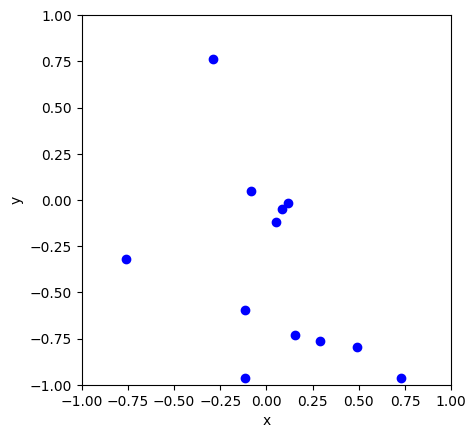

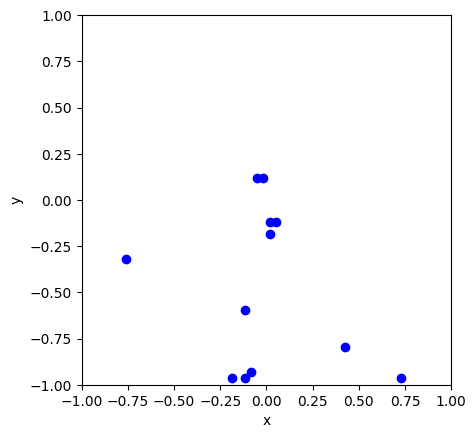

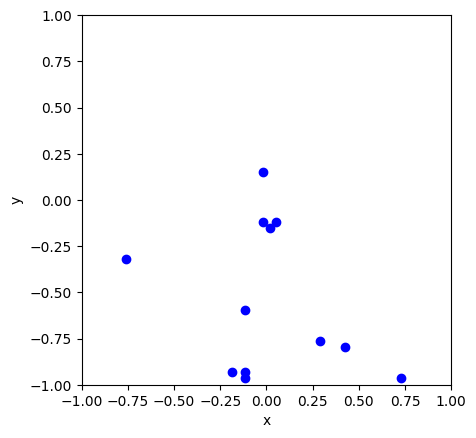

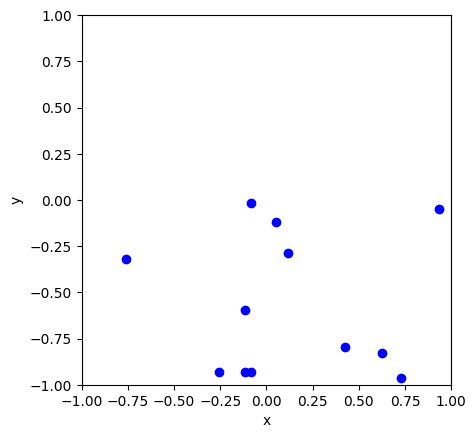

In [18]:
for ii in range(len(num_basis)):
    POD_basis=num_basis[ii]
    
    # SOPT
    msmt_idx=msmt_idx_list[ii]
    num_msmt=len(msmt_idx)
    print("# of measurments: {}".format(num_msmt))
    print(msmt_idx)

    # plot measuremnt positions
    plt.figure()
    plt.scatter(x[msmt_idx],y[msmt_idx], color = 'blue')
    plt.axis('square')
    plt.axis([xmin,xmax,ymin,ymax])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.savefig("../__result/ex9_advection/ex9_POD_{}_SOPT_{}_samples.png".format(POD_basis,num_msmt))

# of POD basis is 3
# of measurments: 12
[  86  111  404  458  514  746 1207 1591 1712 1773 1887 3141]
Param is 75
Time elapsed: 0.9428322315216064 sec
average relative error of u: 424.6462749803137%
maximum relative error of u: 631.142712422834%

Param is 76
Time elapsed: 0.8483548164367676 sec
average relative error of u: 432.0039295078549%
maximum relative error of u: 642.3091209734705%

Param is 77
Time elapsed: 0.9404232501983643 sec
average relative error of u: 439.32400116322646%
maximum relative error of u: 653.4381412446854%

Param is 78
Time elapsed: 0.9013235569000244 sec
average relative error of u: 446.5994789391069%
maximum relative error of u: 664.5199213174009%

Param is 79
Time elapsed: 0.762995719909668 sec
average relative error of u: 453.82247479222065%
maximum relative error of u: 675.5439291004238%

Param is 80
Time elapsed: 0.9095635414123535 sec
average relative error of u: 460.98502094219185%
maximum relative error of u: 686.4990095821373%

Param is 81
Time ela

Time elapsed: 1.0631816387176514 sec
average relative error of u: 46.05725876391055%
maximum relative error of u: 60.16537241774488%

Param is 80
Time elapsed: 1.3476221561431885 sec
average relative error of u: 47.181200073575894%
maximum relative error of u: 61.570745106999134%

Param is 81
Time elapsed: 1.269536018371582 sec
average relative error of u: 48.30115394048676%
maximum relative error of u: 62.97304698265592%

Param is 82
Time elapsed: 1.2183144092559814 sec
average relative error of u: 49.41468715995174%
maximum relative error of u: 64.36991928060206%

Param is 83
Time elapsed: 1.1960432529449463 sec
average relative error of u: 50.519306519526%
maximum relative error of u: 65.76034398000537%

Param is 84
Time elapsed: 1.4320006370544434 sec
average relative error of u: 51.61231106646793%
maximum relative error of u: 67.14008618037886%

Param is 85
Time elapsed: 1.2973480224609375 sec
average relative error of u: 52.690999091249644%
maximum relative error of u: 68.5084368

Time elapsed: 1.0042545795440674 sec
average relative error of u: 34.293803839291414%
maximum relative error of u: 48.23810689809686%

Param is 85
Time elapsed: 1.1464734077453613 sec
average relative error of u: 35.36825205146825%
maximum relative error of u: 49.538796520096135%

Param is 86
Time elapsed: 1.178727626800537 sec
average relative error of u: 36.44958132572585%
maximum relative error of u: 50.835566716645545%

Param is 87
Time elapsed: 1.094320297241211 sec
average relative error of u: 37.534606823108646%
maximum relative error of u: 52.12566508072991%

Param is 88
Time elapsed: 1.1076862812042236 sec
average relative error of u: 38.62012441688574%
maximum relative error of u: 53.40628348626113%

Param is 89
Time elapsed: 1.0205979347229004 sec
average relative error of u: 39.70283197514045%
maximum relative error of u: 54.67450012948135%

Param is 90
Time elapsed: 1.0399127006530762 sec
average relative error of u: 40.77933706629544%
maximum relative error of u: 55.92833

Time elapsed: 1.1026794910430908 sec
average relative error of u: 47.86120086103978%
maximum relative error of u: 66.46474209680188%

Param is 90
Time elapsed: 1.2129111289978027 sec
average relative error of u: 48.908570011136895%
maximum relative error of u: 67.5499904304529%

Param is 91
Time elapsed: 1.4428117275238037 sec
average relative error of u: 49.949140975434204%
maximum relative error of u: 68.6071276508487%

Param is 92
Time elapsed: 1.5457849502563477 sec
average relative error of u: 50.98011725105754%
maximum relative error of u: 69.6317718218659%

Param is 93
Time elapsed: 1.293818473815918 sec
average relative error of u: 51.99852579790949%
maximum relative error of u: 70.62311768848068%

Param is 94
Time elapsed: 1.0706686973571777 sec
average relative error of u: 53.00146235590882%
maximum relative error of u: 71.57651499537198%

Param is 95
Time elapsed: 0.6626400947570801 sec
average relative error of u: 53.985860023064866%
maximum relative error of u: 72.49087000

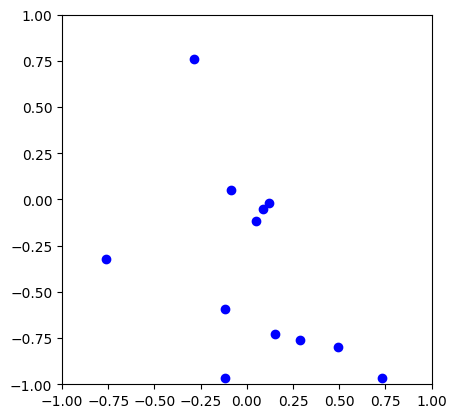

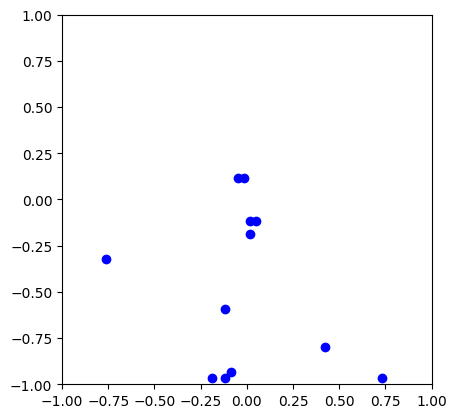

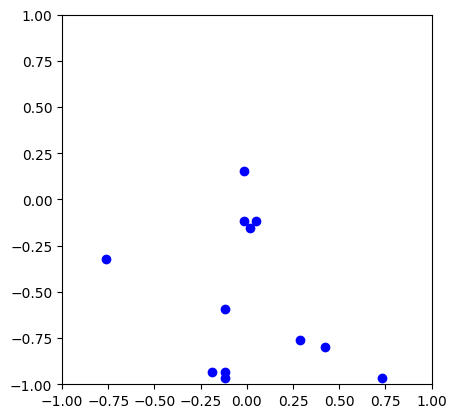

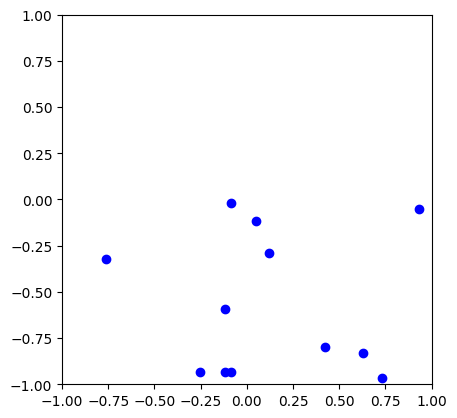

In [19]:
solution=np.zeros((len(num_basis),len(FOM_parameters),nt+1,nx*ny))
avg_rel_err=np.zeros((len(num_basis),len(FOM_parameters)))
rel_err=np.zeros((len(num_basis),len(FOM_parameters),nt+1))
elapsed_time=np.zeros((len(num_basis),len(FOM_parameters)))

with open(file=file_name_SVD, mode='rb') as ff:  
    SVD = pickle.load(ff)

for ii in range(len(num_basis)):
    POD_basis=num_basis[ii]
    print("# of POD basis is {}".format(POD_basis))
    
    # SOPT
    msmt_idx=msmt_idx_list[ii]
    num_msmt=len(msmt_idx)
    print("# of measurments: {}".format(num_msmt))
    print(msmt_idx)

    # plot measuremnt positions
    plt.figure()
    plt.scatter(x[msmt_idx],y[msmt_idx], color = 'blue')
    plt.axis('square')
    plt.axis([xmin,xmax,ymin,ymax])
    plt.show()
    
    # Basis matrix
    phi_u = SVD['U'][:,:POD_basis]

    phim_u=phi_u[msmt_idx]
    phim_u_pinv=np.linalg.pinv(phim_u)
    
    for jj in range(len(FOM_parameters)):
        FOM_parameter=FOM_parameters[jj]
        print("Param is {}".format(FOM_parameter))
        
        # Load FOM solution
        ex = np.load('../__data/ex9_advection/ex9_interp_{}.npz'.format(FOM_parameter), allow_pickle = True)
        ex = ex.f.arr_0
        u_full = ex.reshape(nt+1,-1)

        # take measurments
        um = u_full[:,msmt_idx]

        # Initial condition
        u0=u_full[0]
        u_ref = u0

        # Gappy POD
        t_start_gappyPOD=time.time()

        # solution
        u_gappyPOD=np.zeros((nt+1,ny*nx))
        u_hat=np.zeros((nt+1,POD_basis))

        # IC
        u_hat0=np.zeros(POD_basis)
        u_gappyPOD[0]=np.copy(u0)

        for n in range(nt):
            u_hat[n+1] = phim_u_pinv.dot(um[n+1]-u_ref[msmt_idx])
            u_gappyPOD[n+1] = u_ref + phi_u.dot(u_hat[n+1])

        # elapsed time
        t_elapsed_gappyPOD=time.time()-t_start_gappyPOD
        print('Time elapsed: {} sec'.format(t_elapsed_gappyPOD))

        # error
        u_rel_err_gappyPOD=np.linalg.norm(u_full-u_gappyPOD,ord=2,axis=1)/np.linalg.norm(u_full,ord=2,axis=1)*100
        u_avg_rel_err=np.sqrt(np.sum(np.linalg.norm(u_full-u_gappyPOD,ord=2,axis=1)**2))/np.sqrt(np.sum(np.linalg.norm(u_full,ord=2,axis=1)**2))*100
        print("average relative error of u: {}%".format(u_avg_rel_err))
        print("maximum relative error of u: {}%".format(np.max(u_rel_err_gappyPOD)))
        print()

        # save result
        solution[ii,jj]=u_gappyPOD
        avg_rel_err[ii,jj]=u_avg_rel_err
        rel_err[ii,jj]=u_rel_err_gappyPOD
        elapsed_time[ii,jj]=t_elapsed_gappyPOD
    
results={'solution':solution,'avg_rel_err':avg_rel_err,'rel_err':rel_err,'elapsed_time':elapsed_time}
with open(file=file_path_gappy_SOPT_result, mode='wb') as ff:
    pickle.dump(results, ff)

In [28]:
print(num_basis)
idx=[0,1,2,3]
num_basis[idx]

[3 4 5 6]


array([3, 4, 5, 6])

Text(0.5, 1.0, 'Max. Rel. Err. vs Parameters')

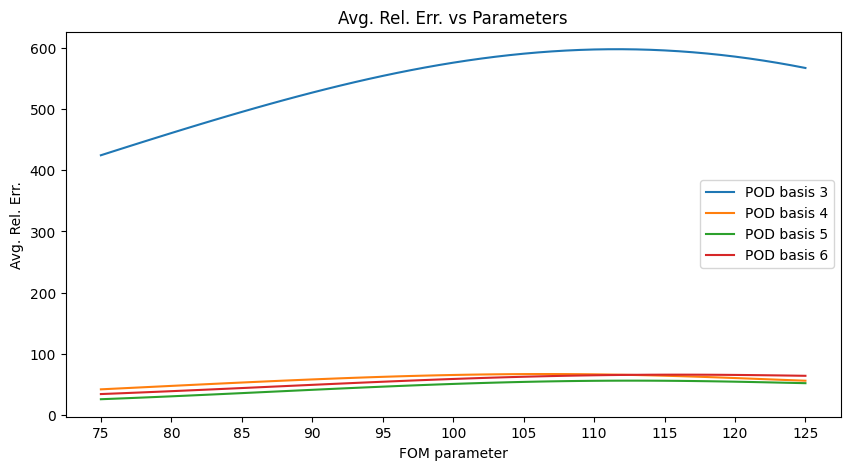

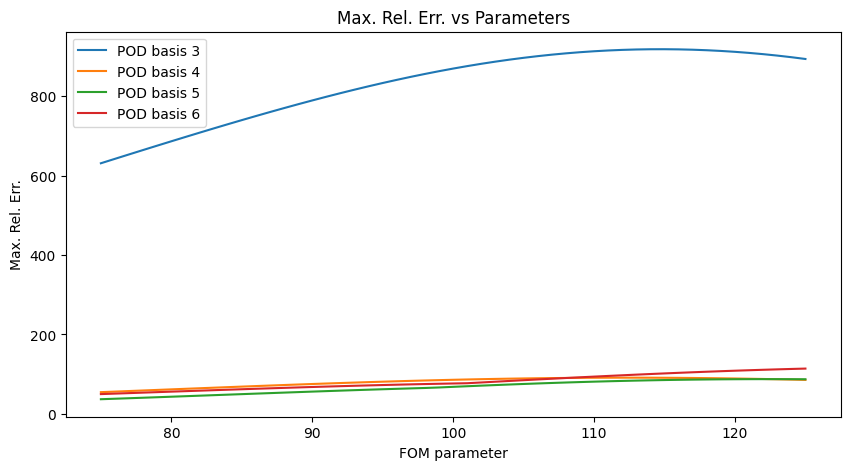

In [29]:
# with open(file=file_path_gappy_SOPT_result, mode='rb') as ff:
#     results=pickle.load(ff)    

# figure avg.rel.err vs params
plt.figure(figsize=(10,5))
for i in idx:   
    plt.plot(FOM_parameters,results['avg_rel_err'][i])
plt.xlabel('FOM parameter')
plt.ylabel('Avg. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])

ax=plt.gca()
ax.xaxis.set_major_locator(IndexLocator(p_inter,0))
ax.xaxis.set_minor_locator(IndexLocator(p_inter,p_inter))
ax.tick_params(axis='x',which='minor',labelcolor='blue',labelsize=20)
plt.title('Avg. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex9_advection/ex9_POD_SOPT_avg_rel_err.png")

# figure rel.err vs data points
plt.figure(figsize=(10,5))
plt_inter=1
for i in idx:   
    plt.plot(FOM_parameters,results['rel_err'][i].max(axis=1))
plt.xlabel('FOM parameter')
plt.ylabel('Max. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])
plt.title('Max. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex9_advection/ex9_POD_SOPT_max_rel_err.png")

In [30]:
print(num_basis)
print(FOM_parameters)

[3 4 5 6]
[ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125]


In [31]:
idx=[1,2,3]
num_basis[idx]

array([4, 5, 6])

Text(0.5, 1.0, 'Max. Rel. Err. vs Parameters')

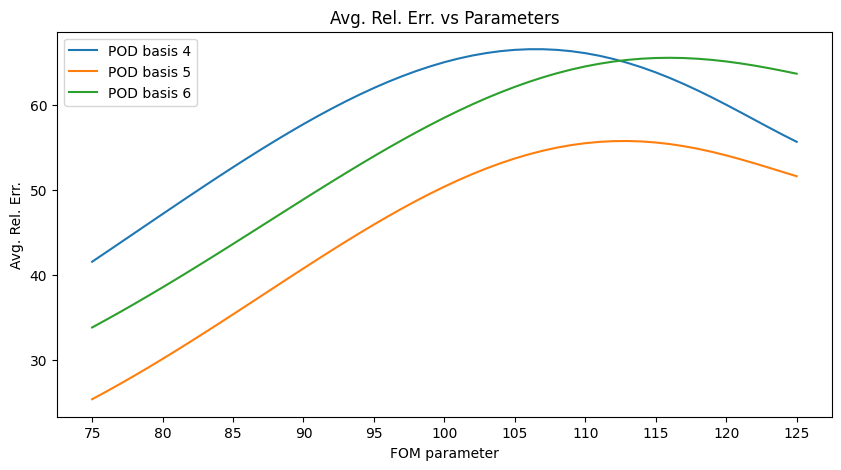

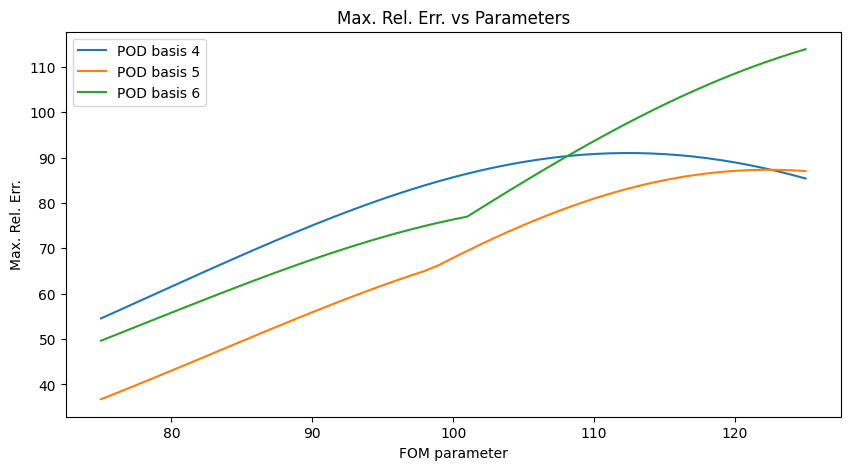

In [32]:
# with open(file=file_path_gappy_SOPT_result, mode='rb') as ff:
#     results=pickle.load(ff)    

# figure avg.rel.err vs params
plt.figure(figsize=(10,5))
for i in idx:   
    plt.plot(FOM_parameters,results['avg_rel_err'][i])
plt.xlabel('FOM parameter')
plt.ylabel('Avg. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])

ax=plt.gca()
ax.xaxis.set_major_locator(IndexLocator(p_inter,0))
ax.xaxis.set_minor_locator(IndexLocator(p_inter,p_inter))
ax.tick_params(axis='x',which='minor',labelcolor='blue',labelsize=20)
plt.title('Avg. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex9_advection/ex9_POD_{}_SOPT_avg_rel_err.png".format(int(num_basis[idx])))

# figure rel.err vs data points
plt.figure(figsize=(10,5))
plt_inter=1
for i in idx:   
    plt.plot(FOM_parameters,results['rel_err'][i].max(axis=1))
plt.xlabel('FOM parameter')
plt.ylabel('Max. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])
plt.title('Max. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex9_advection/ex9_POD_{}_SOPT_max_rel_err.png".format(int(num_basis[idx])))

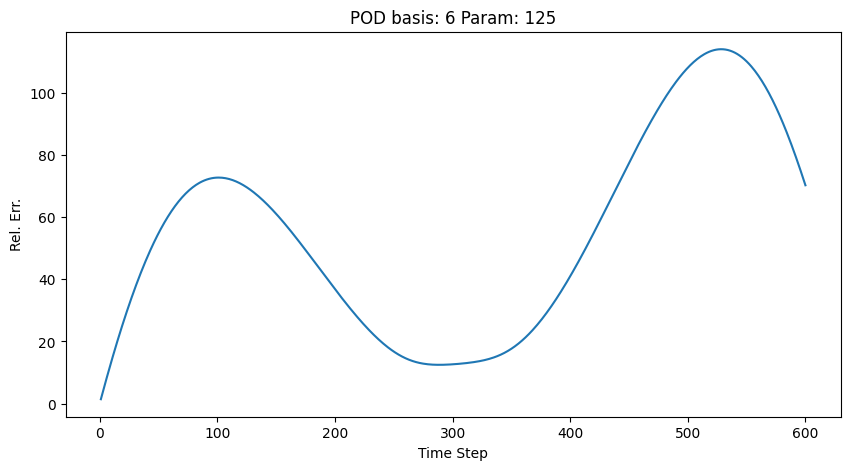

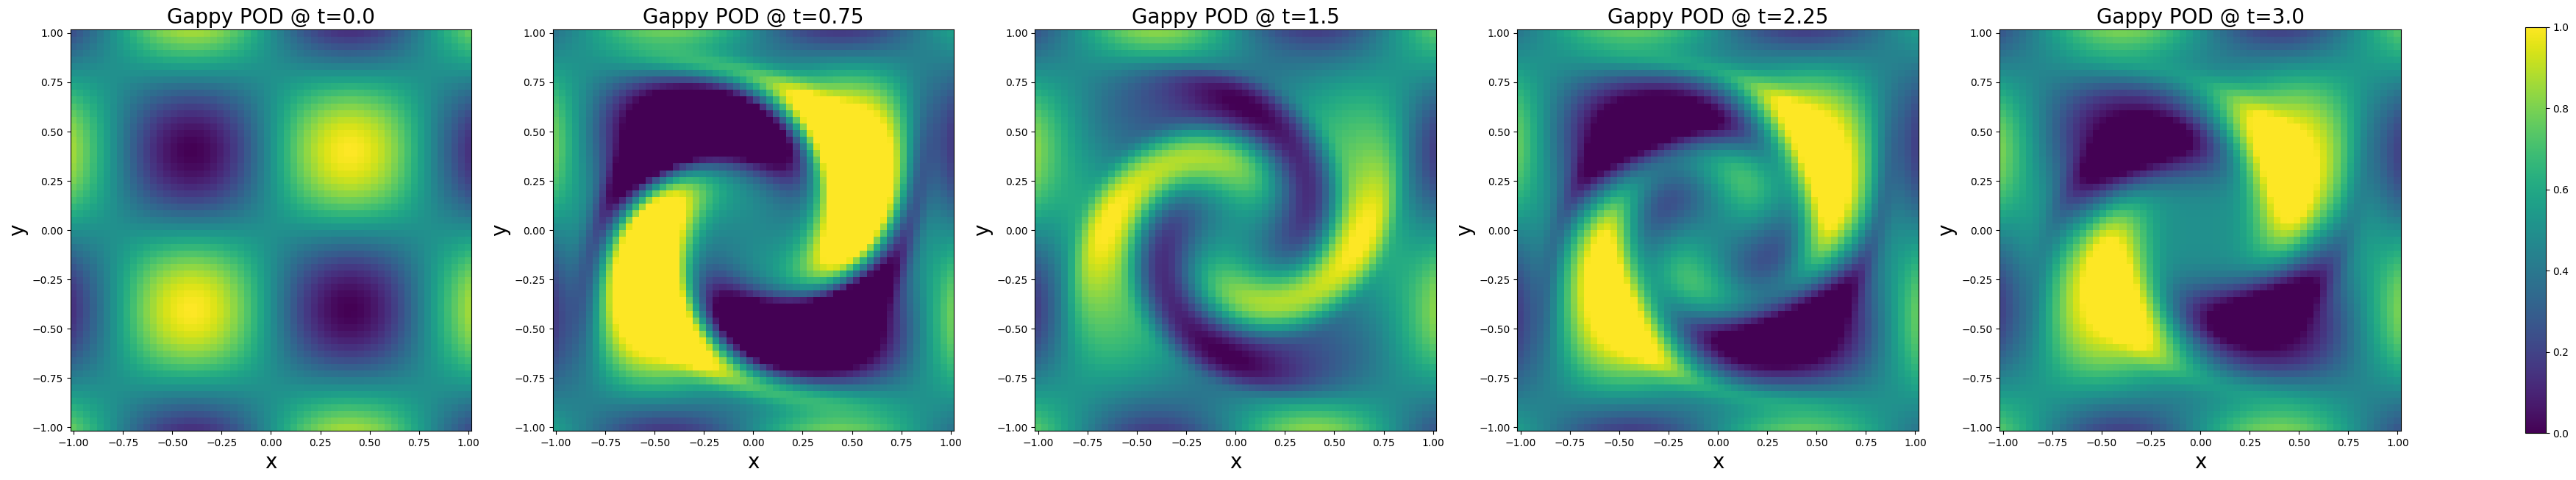

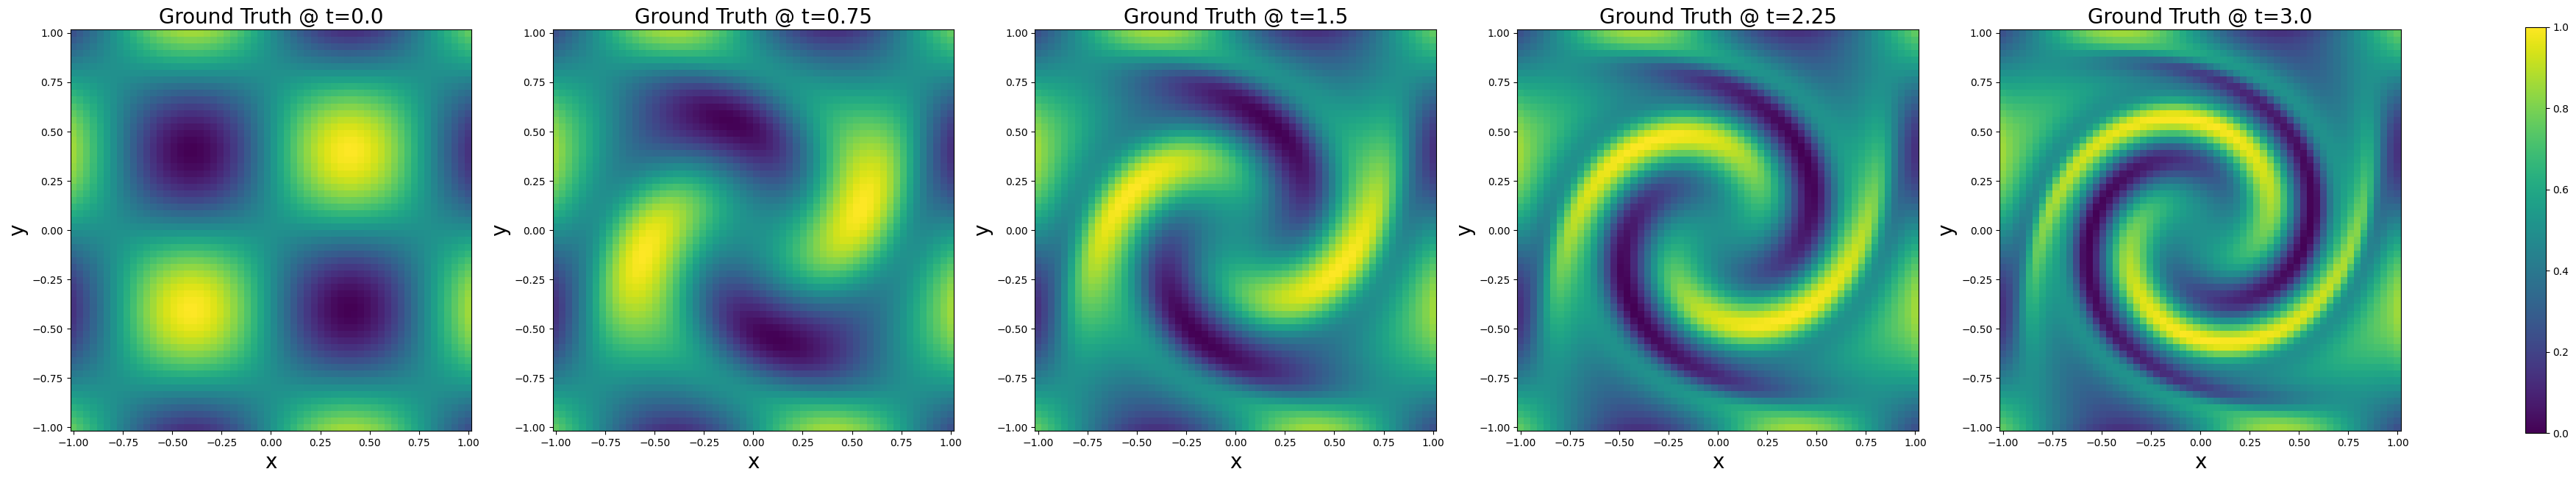

In [25]:
# figure rel.err vs at given param and POD basis
i=3;j=-1
POD_basis=num_basis[i]                 
param=FOM_parameters[j]

u_gappyPOD=results['solution'][i,j]

ex = np.load('../__data/ex9_advection/ex9_interp_{}.npz'.format(param), allow_pickle = True)
ex = ex.f.arr_0
u_full = ex.reshape(nt+1,-1)

plt.figure(figsize=(10,5))
plt.plot(np.arange(1,nt+1),results['rel_err'][i,j,1:].flatten())
plt.xlabel('Time Step')
plt.ylabel('Rel. Err.')
plt.title("POD basis: {} Param: {}".format(POD_basis,param))
plt.show()

# plot original data
vmin=0; vmax=1
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(35,7),layout='constrained')
for i in range(len(axes)):
    ax=axes[i]
    pcm = ax.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_gappyPOD[int(nt/4)*i].reshape(ny,nx),vmin=vmin,vmax=vmax)
    ax.axis('square')
    ax.set_xlabel('x',fontsize=20)
    ax.set_ylabel('y',fontsize=20)
    ax.set_title('Gappy POD @ t={}'.format(int(nt/4)*i*dt),fontsize=20)

fig.colorbar(pcm, ax=axes.tolist(),shrink=0.8)
# plt.savefig("../__result/ex9_advection/ex9_POD_{}_SOPT_SOL.png".format(POD_basis))

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(35,7),layout='constrained')
for i in range(len(axes)):
    ax=axes[i]
    pcm = ax.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_full[int(nt/4)*i].reshape(ny,nx),vmin=vmin,vmax=vmax)
    ax.axis('square')
    ax.set_xlabel('x',fontsize=20)
    ax.set_ylabel('y',fontsize=20)
    ax.set_title('Ground Truth @ t={}'.format(int(nt/4)*i*dt),fontsize=20)

fig.colorbar(pcm, ax=axes.tolist(),shrink=0.8)
# plt.savefig("../__result/ex9_advection/ex9_ground_truth.png")